#Table of Contents
* [1. A simple gaussian distribution](#1.-A-simple-gaussian-distribution)
	* [1.1 Sampling mean - Central limit theorem](#1.1-Sampling-mean---Central-limit-theorem)
	* [1.2 Box Plots](#1.2-Box-Plots)
	* [1.3 Error bar plots](#1.3-Error-bar-plots)
* [2. Trying with a different pdf](#2.-Trying-with-a-different-pdf)
	* [2.1 Bimodal distribution](#2.1-Bimodal-distribution)
		* [2.1.1 Bimodal pdf](#2.1.1-Bimodal-pdf)
		* [2.1.2 st moment of x](#2.1.2-st-moment-of-x)
			* [2.1.2.1 nd moment of x](#2.1.2.1-nd-moment-of-x)
			* [2.1.2.2 Variance](#2.1.2.2-Variance)
		* [2.1.3 Numerical integration](#2.1.3-Numerical-integration)
		* [2.1.4 Plotting](#2.1.4-Plotting)
		* [2.1.5 Random number generation](#2.1.5-Random-number-generation)
	* [2.2 Distributions with infinite variance, but still with a mean](#2.2-Distributions-with-infinite-variance,-but-still-with-a-mean)
		* [2.2.1 Pareto distribution](#2.2.1-Pareto-distribution)
		* [2.2.2 Random number generation](#2.2.2-Random-number-generation)
	* [2.3 Fat-Tail distributions](#2.3-Fat-Tail-distributions)
		* [2.3.1 Compare Cauchy with Gaussian distribution](#2.3.1-Compare-Cauchy-with-Gaussian-distribution)
		* [2.3.2 Effect of fat tails in random events](#2.3.2-Effect-of-fat-tails-in-random-events)
			* [2.3.2.1 Notice the rug plot](#2.3.2.1-Notice-the-rug-plot)
		* [2.3.3 Going back to the Central Limit theorem example](#2.3.3-Going-back-to-the-Central-Limit-theorem-example)
		* [2.3.4 Box Plots](#2.3.4-Box-Plots)
		* [2.3.5 The example with the gaussian distribution](#2.3.5-The-example-with-the-gaussian-distribution)


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import stats

#In order to change the matplotlib image format, uncomment the following lines
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [2]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# 1. A simple gaussian distribution

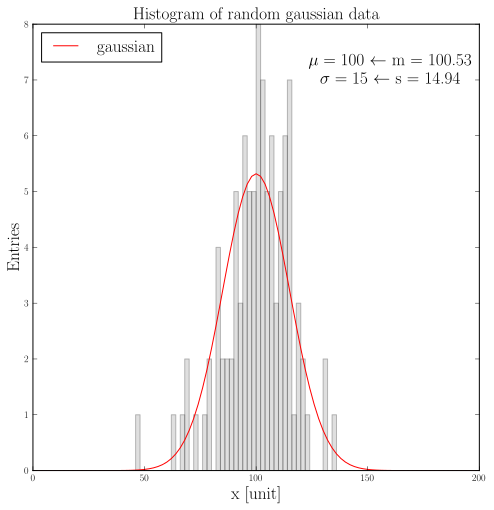

In [3]:
# Generate gaussian random numbers
np.random.seed(1234)
mu, sigma = 100, 15

sample_size = 100  # <<<<<< NB: this is the sample size 
data = np.random.normal(loc=mu,scale=sigma,size=sample_size)

# Get mean and std of sample
data_mean = np.round(np.mean(data),2)
data_std = np.round(np.std(data),2)


# Define histogram binning
bin_size = 2; min_edge = 0; max_edge = 200
Nbins = int(round((max_edge-min_edge)/bin_size))
Nedges = Nbins + 1
bin_list = np.linspace(min_edge, max_edge, Nedges)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# the histogram of the data
n, bin, patch = ax.hist(data, bins=bin_list, facecolor='gray', alpha=0.25)

# add labels to axis to explain the histogram content
plt.xlabel('x [unit]',fontsize = 'xx-large')
plt.ylabel('Entries',fontsize = 'xx-large')
plt.title('Histogram of random gaussian data',fontsize = 'xx-large')

# add statistics
plt.text(0.8, 0.9,
        '$\mu = %s$ $\leftarrow$ \t m = %s\n$\sigma = %s$ $\leftarrow$ \t s = %s' % 
        (mu, data_mean, sigma, data_std),
         horizontalalignment='center',
         verticalalignment='center',
         fontsize = 'xx-large',
         transform = ax.transAxes)

ax.plot(bin_list, bin_size*sample_size*stats.norm.pdf(bin_list,loc=mu, scale=sigma)  , 'r-', label="gaussian")
ax.legend(loc=2,fontsize = 'xx-large')

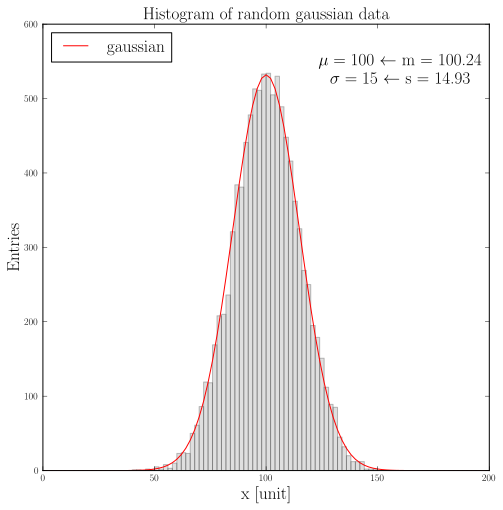

In [4]:
# Generate gaussian random numbers
np.random.seed(1234)
mu, sigma = 100, 15

sample_size = 10000  # <<<<<< NB: this is the sample size 
data = np.random.normal(loc=mu,scale=sigma,size=sample_size)

# Get mean and std of sample
data_mean = np.round(np.mean(data),2)
data_std = np.round(np.std(data),2)


# Define histogram binning
bin_size = 2; min_edge = 0; max_edge = 200
Nbins = int(round((max_edge-min_edge)/bin_size))
Nedges = Nbins + 1
bin_list = np.linspace(min_edge, max_edge, Nedges)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# the histogram of the data
n, bin, patch = ax.hist(data, bins=bin_list, facecolor='gray', alpha=0.25)

# add labels to axis to explain the histogram content
plt.xlabel('x [unit]',fontsize = 'xx-large')
plt.ylabel('Entries',fontsize = 'xx-large')
plt.title('Histogram of random gaussian data',fontsize = 'xx-large')

# add statistics
plt.text(0.8, 0.9,
        '$\mu = %s$ $\leftarrow$ \t m = %s\n$\sigma = %s$ $\leftarrow$ \t s = %s' % 
        (mu, data_mean, sigma, data_std),
         horizontalalignment='center',
         verticalalignment='center',
         fontsize = 'xx-large',
         transform = ax.transAxes)

ax.plot(bin_list, bin_size*sample_size*stats.norm.pdf(bin_list,loc=mu, scale=sigma)  , 'r-', label="gaussian")
ax.legend(loc=2,fontsize = 'xx-large')

## 1.1 Sampling mean - Central limit theorem

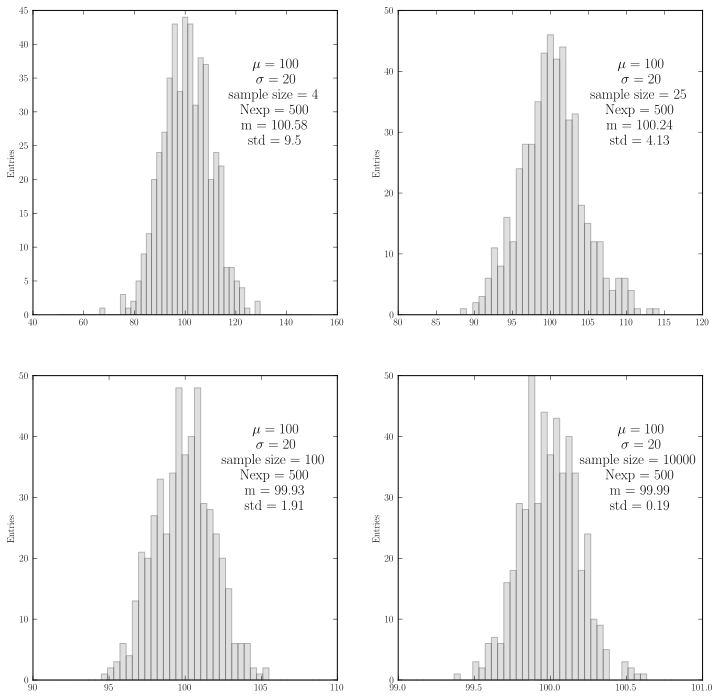

In [5]:
sample_sizes = [4, 25, 100, 10000]
NToyExp = 500

np.random.seed(1234)
mu, sigma = 100, 20

fig, ax = plt.subplots(nrows=2, ncols=2 ,figsize=(12,12), squeeze=False)

sample_mean_coll = []
hist_mean_coll = []
hist_sigma_coll = []
histo_list = []
for i, sample_size in enumerate(sample_sizes):
        sample_array = np.random.normal(loc=mu,scale=sigma,size=(NToyExp,sample_size))
        #sample_array = np.array([mu + sigma * np.random.randn(sample_size) for j in np.arange(NToyExp)])
        sample_mean = np.mean(sample_array, axis=1)
        sample_mean = np.mean(sample_array, axis=1)
        sample_mean_coll.append(sample_mean)
        
        # the histogram of the data
        N = 50
        xmin = mu-5*sigma/np.sqrt(sample_size)
        xmax = mu+5*sigma/np.sqrt(sample_size)
        bin_list = np.linspace(xmin, xmax, 50)
 
        #Matplotlib
        axis = ax.flat[i]
        axis.hist(sample_mean, bins=bin_list, facecolor='grey', alpha=0.25)
          
        hist_mean  = np.round(np.mean(sample_mean),2)
        hist_sigma = np.round(np.std(sample_mean),2)
        hist_mean_coll.append(hist_mean)
        hist_sigma_coll.append(hist_sigma)
                             
        # add statistics
        axis.text(0.8, 0.7,
                '$\mu = %s$\n $\sigma = %s$\n sample size = %s \n Nexp = %s \n m = %s\n std = %s' \
                 % (mu, sigma, sample_size, len(sample_mean),hist_mean, hist_sigma),
                 horizontalalignment='center',
                 verticalalignment='center',
                 transform = axis.transAxes,
                 fontsize = 'x-large')
        axis.set_ylabel('Entries')


## 1.2 Box Plots

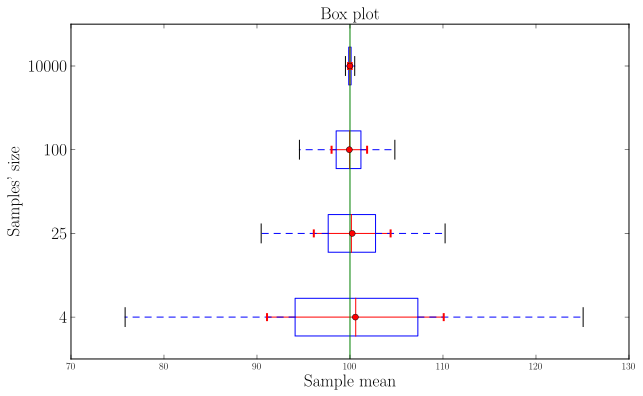

In [6]:
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg')

fig_gaus = plt.figure(figsize=(10,6))
data = sample_mean_coll
ax = fig_gaus.add_subplot(111)
ax.boxplot(data, notch=False, sym='', vert=False)
ax.set_yticklabels(labels=sample_sizes,fontsize = 'xx-large') 
ax.axvline(mu,color='g')
ax.errorbar(hist_mean_coll,[1, 2, 3, 4],xerr=hist_sigma_coll,fmt='o',color='r',capthick=2)

plt.title('Box plot',fontsize = 'xx-large')
plt.xlabel('Sample mean',fontsize = 'xx-large')
plt.ylabel('Samples\' size',fontsize = 'xx-large')
plt.show()


## 1.3 Error bar plots

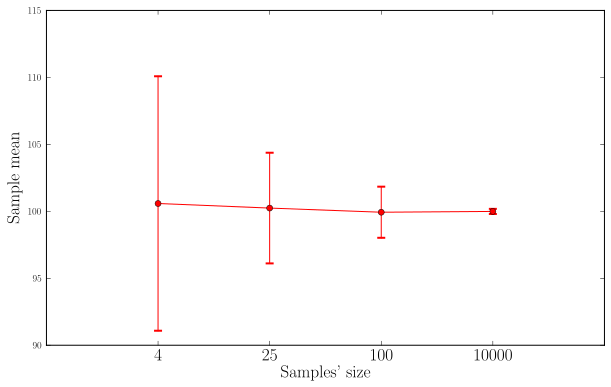

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.errorbar([1, 2, 3,4], hist_mean_coll,yerr=hist_sigma_coll, fmt='-o',color='r',capthick=2)
ax.set_xlim([0,5])
xlabels = [""]
xlabels.extend(sample_sizes)
ax.set_xticklabels(labels=xlabels,fontsize = 'xx-large') 
plt.ylabel('Sample mean',fontsize = 'xx-large')
plt.xlabel('Samples\' size',fontsize = 'xx-large')


# 2. Trying with a different pdf

## 2.1 Bimodal distribution

### 2.1.1 Bimodal pdf

In [8]:
#config params
frac = .4
loc1, scale1 = (-2, 4)
loc2, scale2 = (3, 2.5)

#definition of pdf
pdf = lambda x,loc,scale : stats.norm.pdf(x,loc=loc,scale=scale)
pdf1 = lambda x: pdf(x, loc=loc1, scale=scale1) * frac 
pdf2 = lambda x: pdf(x, loc=loc2, scale=scale2) * (1-frac)
bimodal_pdf = lambda x : pdf1(x) + pdf2(x)

### 2.1.2 st moment of x

$ E[x] = \mu = \int_{-\infty}^\infty \! xf(x) \, \mathrm{d}x$

#### 2.1.2.1 nd moment of x

$ E[x^2] = \int_{-\infty}^\infty \! x^2f(x) \, \mathrm{d}x$

#### 2.1.2.2 Variance

$ E[(x-E[x])^2] = E[x^2] - E[x]^2 $

### 2.1.3 Numerical integration

In [9]:
#how to perform numerical integration of defined function
from scipy import integrate

integrand_mean = lambda x: x*bimodal_pdf(x)
pdf_mean, _ = integrate.quad(integrand_mean, -np.inf, np.inf)

integrand_x2 = lambda x: (x)**2*bimodal_pdf(x)
E_x2, _ = integrate.quad(integrand_x2,-np.inf, np.inf)
pdf_std = np.round(np.sqrt(E_x2-pdf_mean**2),1)

In [10]:
pdf_mean

1.0000000000000002

In [11]:
pdf_std

4.0

### 2.1.4 Plotting

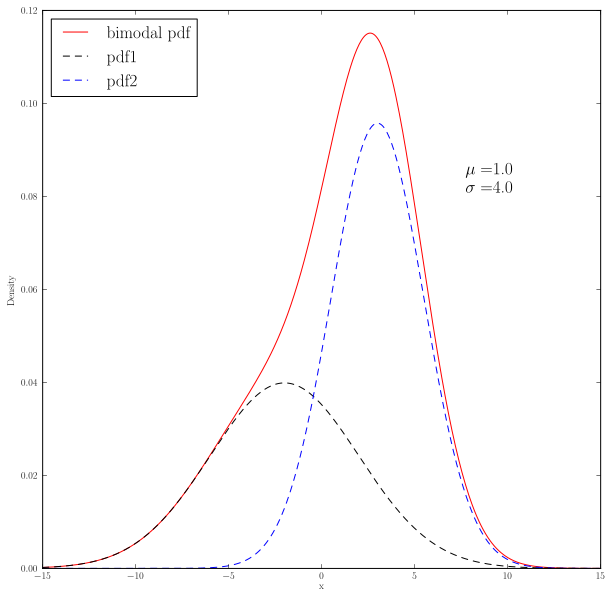

In [12]:
x_eval = np.linspace(-15,15,500)
fig, ax = plt.subplots(ncols=1,figsize=(10, 10))
ax.plot(x_eval, bimodal_pdf(x_eval), 'r-', label="bimodal pdf")
ax.plot(x_eval, pdf1(x_eval), 'k--', label="pdf1")
ax.plot(x_eval, pdf2(x_eval), 'b--', label="pdf2")
ax.legend(loc=2,fontsize = 'xx-large')
ax.set_xlabel('x')
ax.set_ylabel('Density')
ax.text(0.8, 0.7,
            '$\mu=$%s\n$\sigma=$%s' %(pdf_mean,pdf_std),
             horizontalalignment='center',
             verticalalignment='center',
             transform = ax.transAxes,
             fontsize = 'xx-large')

### 2.1.5 Random number generation

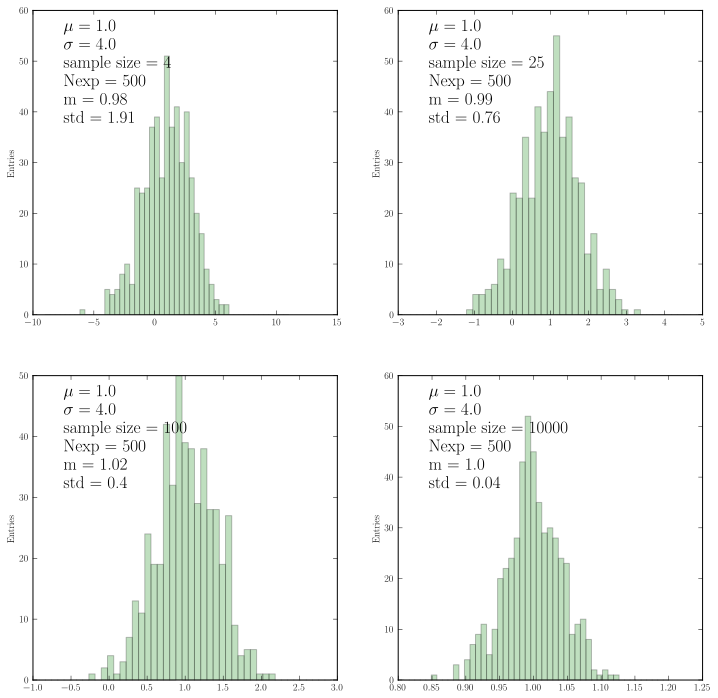

In [13]:
#frac = .4
#loc1, scale1 = (-2, 4)
#loc2, scale2 = (3, 1)

np.random.seed(1234)

sample_sizes = [4, 25, 100, 10000]
NToyExp = 500

fig, ax = plt.subplots(nrows=2, ncols=2 ,figsize=(12,12))

# Generate random sample
a=np.random.normal(loc=loc1,scale=scale1,size=10000*NToyExp*frac)
b=np.random.normal(loc=loc2,scale=scale2,size=10000*NToyExp*(1.-frac))
data_rnd = np.concatenate((a,b))

for i, sample_size in enumerate(sample_sizes):
        #take random sample from the list, without replacement
        sample_array = np.random.choice(data_rnd, (NToyExp,sample_size), replace=False)

        #Extract the mean (N.B. NumPy is working here on a 2D-array)
        sample_mean = np.mean(sample_array, axis=1)

        #Get the hist mean and sigma
        hist_mean  = np.round(np.mean(sample_mean),2)
        hist_sigma = np.round(np.std(sample_mean),2)

        axis = ax.flat[i]
        # the histogram of the data
        N = 50
        xmin = pdf_mean-5*pdf_std/np.sqrt(sample_size)
        xmax = pdf_mean+5*pdf_std/np.sqrt(sample_size)
        bin_list = np.linspace(xmin, xmax, 50)
        
        axis.hist(sample_mean, bins=bin_list, facecolor='green', alpha=0.25)
        
                             
        # add statistics
        axis.text(0.1, 0.8,
                '$\mu = %s$ \n $\sigma = %s$\n sample size = %s \n Nexp = %s \n m = %s \n std = %s' \
                % (pdf_mean, pdf_std, sample_size, len(sample_mean),hist_mean, hist_sigma),
                 horizontalalignment='left',
                 verticalalignment='center',
                 transform = axis.transAxes,
                 fontsize = 'xx-large')
        axis.set_ylabel('Entries')

    

## 2.2 Distributions with infinite variance, but still with a mean

### 2.2.1 Pareto distribution

Pareto mean and sigma  (array(3.0), array(inf))


(0, 10)

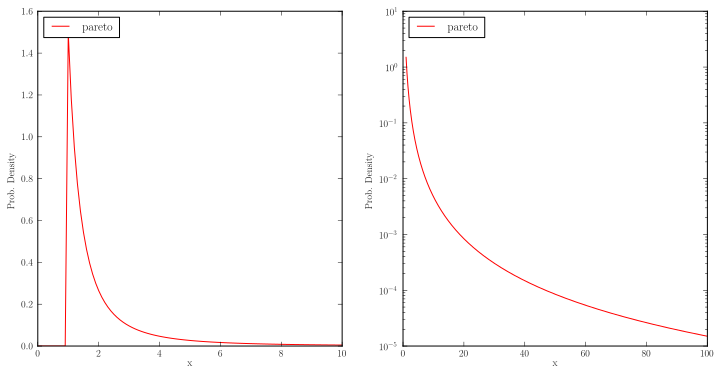

In [14]:
pareto = stats.pareto(1.5)

print "Pareto mean and sigma " , pareto.stats(moments='mv')

x_eval = np.linspace(0,100,1000)
fig, ax = plt.subplots(ncols=2,figsize=(12, 6))
for i in [0,1]:
    ax[i].plot(x_eval, pareto.pdf(x_eval), 'r-', label="pareto")
    ax[i].legend(loc=2)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('Prob. Density')
ax[1].set_yscale('log')
ax[0].set_xlim((0,10))  

### 2.2.2 Random number generation

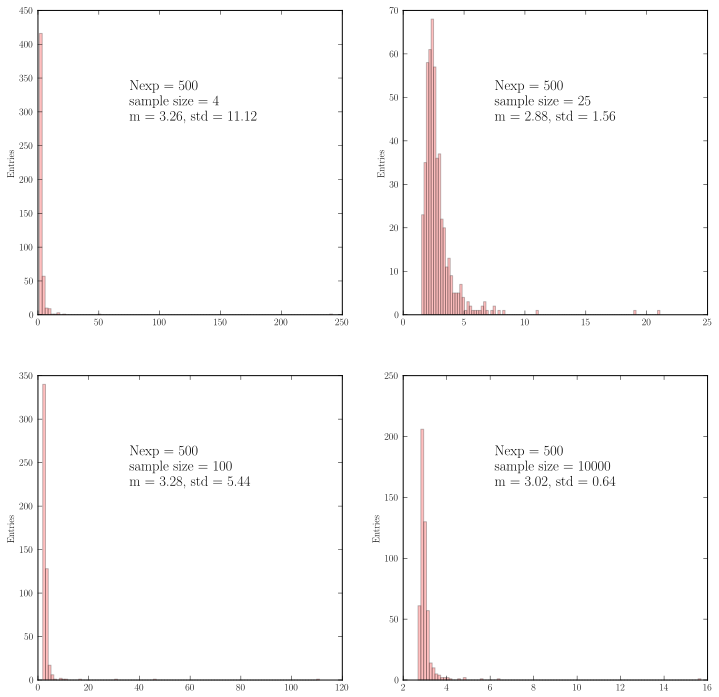

In [22]:
np.random.seed(1234)

sample_sizes = [4, 25, 100, 10000]
NToyExp = 500

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,12))


for i, sample_size in enumerate(sample_sizes):
        #sample_array = np.array([np.random.standard_cauchy(sample_size) for j in np.arange(NToyExp)])
        sample_array = pareto.rvs((NToyExp,sample_size))

        sample_mean = np.mean(sample_array, axis=1)

        # the histogram of the data
        N = 100
        axis=ax.flat[i]
        axis.hist(sample_mean, bins=N, facecolor='red', alpha=0.25)
        
        hist_mean  = np.round(np.mean(sample_mean),2)
        hist_sigma = np.round(np.std(sample_mean),2)
        
        axis.text(0.3, 0.7,
                   'Nexp = %s \n sample size = %s \n m = %s, std = %s' \
                    % (len(sample_mean),sample_size,hist_mean, hist_sigma),
                     verticalalignment='center',
                     transform = axis.transAxes,
                     fontsize = 'x-large')
        axis.set_ylabel('Entries')


## 2.3 Fat-Tail distributions

[Cauchy distribution](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.standard_cauchy.html#numpy.random.standard_cauchy)

$f(x; 0,1) = \frac{1}{\pi (1 + x^2)}$



The Cauchy distribution arises in the solution to the driven harmonic oscillator problem, and also describes spectral line broadening. It also describes the distribution of values at which a line tilted at a random angle will cut the x axis.

When studying hypothesis tests that assume normality, seeing how the tests perform on data from a Cauchy distribution is a good indicator of their sensitivity to a heavy-tailed distribution, since the Cauchy looks very much like a Gaussian distribution, but with heavier tails.


In [16]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

### 2.3.1 Compare Cauchy with Gaussian distribution

(-10, 10)

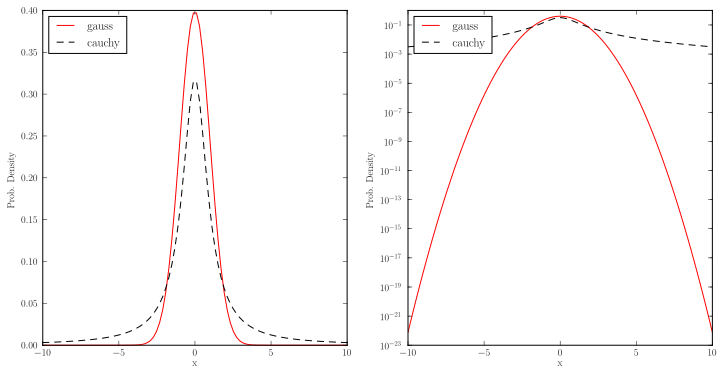

In [17]:
#definition of pdf
pdf_gauss = lambda x : stats.norm.pdf(x)
pdf_cauchy= lambda x: stats.cauchy.pdf(x)

x_eval = np.linspace(-10,10,100)
fig, ax = plt.subplots(ncols=2,figsize=(12, 6))
for i in [0,1]:
    ax[i].plot(x_eval, pdf_gauss(x_eval), 'r-', label="gauss")
    ax[i].plot(x_eval, pdf_cauchy(x_eval), 'k--', label="cauchy")
    ax[i].legend(loc=2)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('Prob. Density')
ax[1].set_yscale('log')
ax[0].set_xlim((-10,10))  

### 2.3.2 Effect of fat tails in random events

#### 2.3.2.1 Notice the rug plot

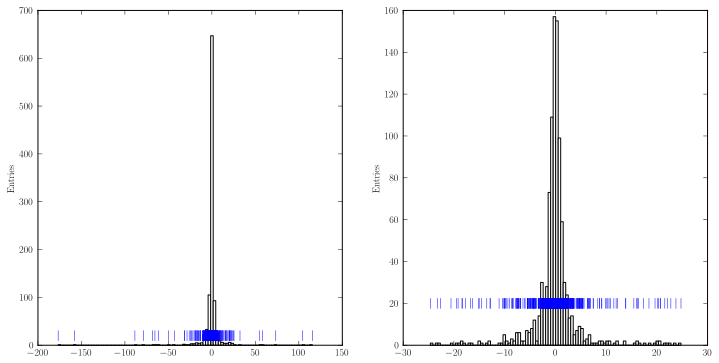

In [23]:
N = 1000
np.random.seed(1234)
s = np.random.standard_cauchy(N)
s_cut = s[(s>-25) & (s<25)]  # truncate distribution so it plots well
data=[s,s_cut]
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
for i, x in enumerate(data):
    ax[i].hist(x, bins=100, facecolor='white')
    ax[i].plot(x, np.zeros(x.shape)+20, 'b|', ms=10)  # rug plot
    ax[i].set_ylabel('Entries')



### 2.3.3 Going back to the Central Limit theorem example

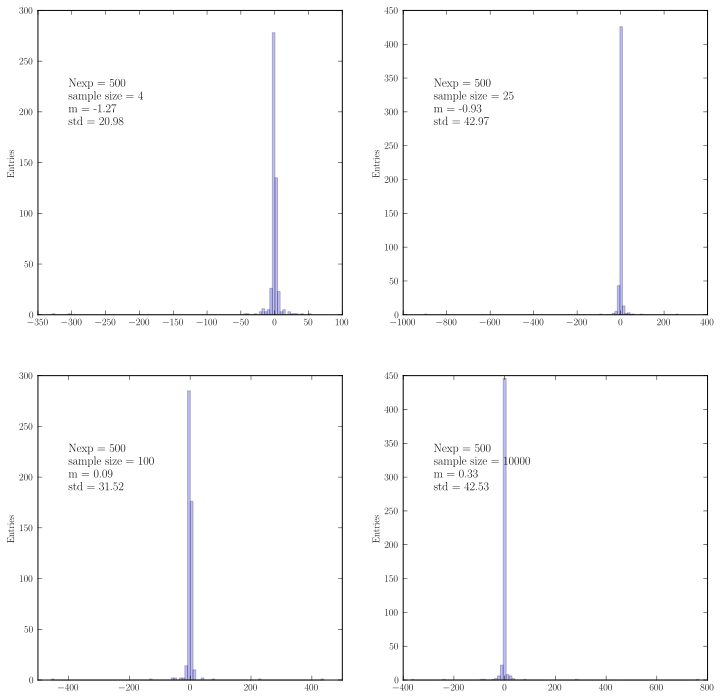

In [24]:
np.random.seed(1234)
sample_sizes = [4, 25, 100, 10000]
NToyExp = 500

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,12))

sample_mean_coll = []
for i, sample_size in enumerate(sample_sizes):
        #sample_array = np.array([np.random.standard_cauchy(sample_size) for j in np.arange(NToyExp)])
        sample_array = np.random.standard_cauchy((NToyExp,sample_size))

        sample_mean = np.mean(sample_array, axis=1)
        sample_mean_coll.append(sample_mean)

        # the histogram of the data
        N = 100
        axis=ax.flat[i]
        axis.hist(sample_mean, bins=N, facecolor='blue', alpha=0.25)
        
        hist_mean  = np.round(np.mean(sample_mean),2)
        hist_sigma = np.round(np.std(sample_mean),2)
        
        axis.text(0.1, 0.7,
                   'Nexp = %s \n sample size = %s \n m = %s\n std = %s' \
                    % (len(sample_mean),sample_size,hist_mean, hist_sigma),
                     horizontalalignment='left',
                     verticalalignment='center',
                     transform = axis.transAxes,
                     fontsize = 'large')
        axis.set_ylabel('Entries')


### 2.3.4 Box Plots

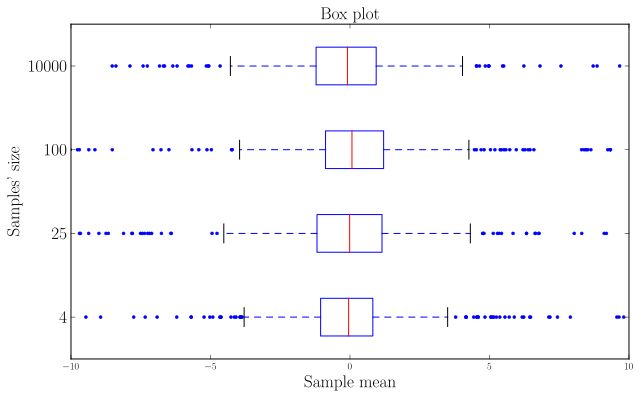

In [20]:
fig = plt.figure(figsize=(10,6))
data = sample_mean_coll
ax = fig.add_subplot(111)
ax.boxplot(data, notch=False, sym='b.', vert=False)
ax.set_yticklabels(labels=sample_sizes,fontsize = 'xx-large') 
ax.set_xlim(-10,10)
plt.title('Box plot',fontsize = 'xx-large')
plt.xlabel('Sample mean',fontsize = 'xx-large')
plt.ylabel('Samples\' size',fontsize = 'xx-large')
plt.show()

### 2.3.5 The example with the gaussian distribution

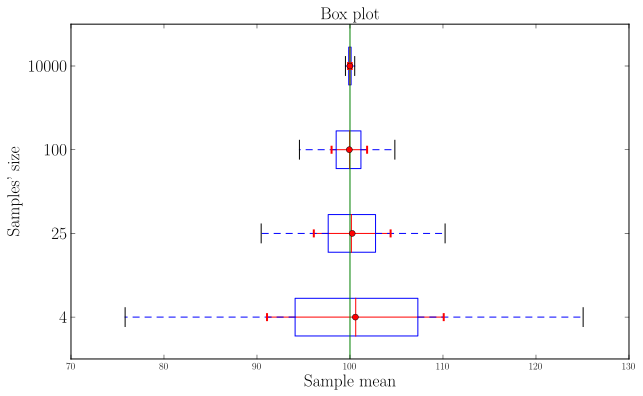

In [21]:
fig_gaus